In [54]:
import pandas as pd
import os
import numpy as np

In [55]:
def calculate_values(df,subject_name,method,order):
    # データ範囲を取得
    data = df.values
    # print(data)
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[  [0.31, -0.04, 0.035],
                        [0.31, -0.04, 0.075],
                        [0.31, -0.04, 0.115],
                        [0.31, 0.0, 0.035],
                        [0.31, 0.0, 0.075],
                        [0.31, 0.0, 0.115],
                        [0.31, 0.04, 0.035],
                        [0.31, 0.04, 0.075],
                        [0.31, 0.04, 0.115],
                        [0.35, -0.04, 0.035],
                        [0.35, -0.04, 0.075],
                        [0.35, -0.04, 0.115],
                        [0.35, 0.0, 0.035],
                        [0.35, 0.0, 0.075],
                        [0.35, 0.0, 0.115],
                        [0.35, 0.04, 0.035],
                        [0.35, 0.04, 0.075],
                        [0.35, 0.04, 0.115],
                        [0.39, -0.04, 0.035],
                        [0.39, -0.04, 0.075],
                        [0.39, -0.04, 0.115],
                        [0.39, 0.0, 0.035],
                        [0.39, 0.0, 0.075],
                        [0.39, 0.0, 0.115],
                        [0.39, 0.04, 0.035],
                        [0.39, 0.04, 0.075],
                        [0.39, 0.04, 0.115]]
    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
             
            x_error= abs(float(data[i][0])-place_values[place_value][0])
            y_error= abs(float(data[i][1])-place_values[place_value][1])
            z_error=abs(float(data[i][2])-place_values[place_value][2])
            squared_error=np.sqrt(x_error**2+y_error**2+z_error**2)
            results.append([
                subject_name,
                method,
                place_value,
               x_error,
              y_error,
              z_error,
              squared_error
                ])
            row_count+=1
    return results
            
    
    
    

In [56]:
# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [57]:
import pathlib
import datetime
# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1

            order=sorted_indices.index(i-1)
            print(i-1,file_path,order)
            df = read_txt_to_dataframe(file_path)
            # all_results.extend(calculate_values_averages(df,subject_name, method,order))
            all_results.extend(calculate_values(df,subject_name, method,order))
            
            # all_results.extend(calculate_values_median(df,subject_name, method,order))

In [58]:
import os
from datetime import datetime

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [59]:

# subject_names=["水上"]


subject_names=["河合","菊池","竹村","廣野里奈","水上","佐々木","小谷","岡本","島川","ほうさん","村上","平岡","浦西","歩さん","伊藤","朴さん"]
# subject_names=["朴さん"]

for i in range(len(subject_names)):
        root_path = r"C:\Users\takaharayota\Research\Semi-Exp3\Values\{}".format(subject_names[i])
        files_paths = [
                root_path + r"\Dense_0.04.txt",
                root_path + r"\Sparse_0.04.txt",
                root_path + r"\NoSound_0.04.txt",
        
        ]

        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)
    
print(all_results)  


# 統合されたデータをデータフレームに変換
columns = ['Subject','Method', 'Place', 'X', 'Y', 'Z','Sum_Squared_Error']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

print("DataFrameの内容がoutput.txtに出力されました。")

-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\河合\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\河合\Sparse_0.04.txt 1
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\河合\NoSound_0.04.txt 2
-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\菊池\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\菊池\Sparse_0.04.txt 1
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\菊池\NoSound_0.04.txt 2
-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\竹村\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\竹村\Sparse_0.04.txt 1
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\竹村\NoSound_0.04.txt 2
-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\廣野里奈\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\廣野里奈\Sparse_0.04.txt 1
1 C:\Users\takaharayota\Research\Semi-Exp3\Values\廣野里奈\NoSound_0.04.txt 2
-1 C:\Users\takaharayota\Research\Semi-Exp3\Values\水上\Dense_0.04.txt 0
0 C:\Users\takaharayota\Research\Semi-Exp3\Values\水上\Sparse_0.04.tx

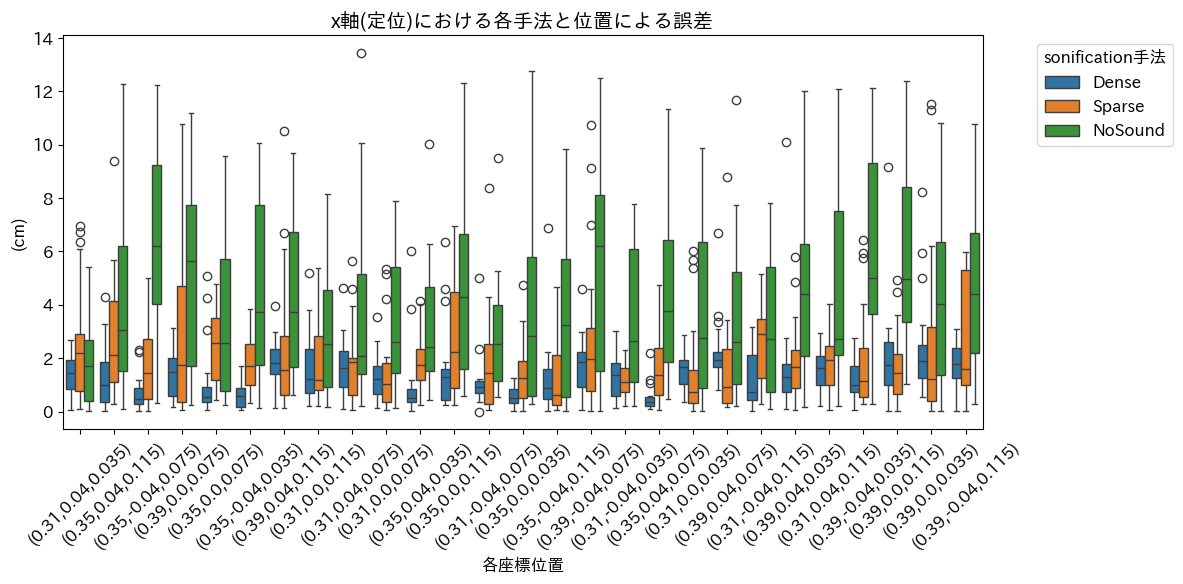

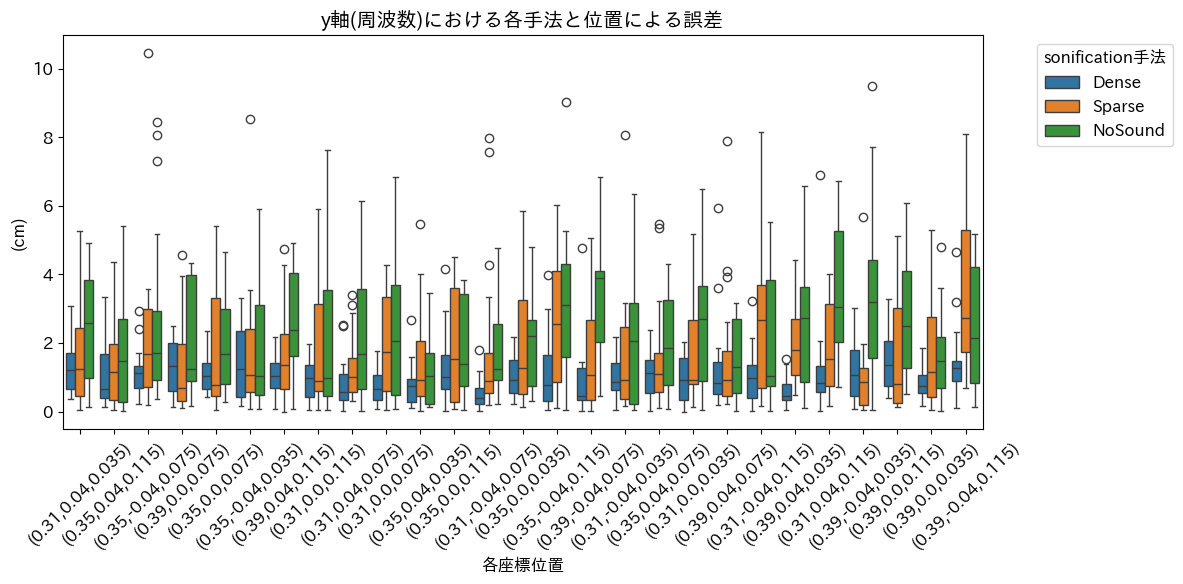

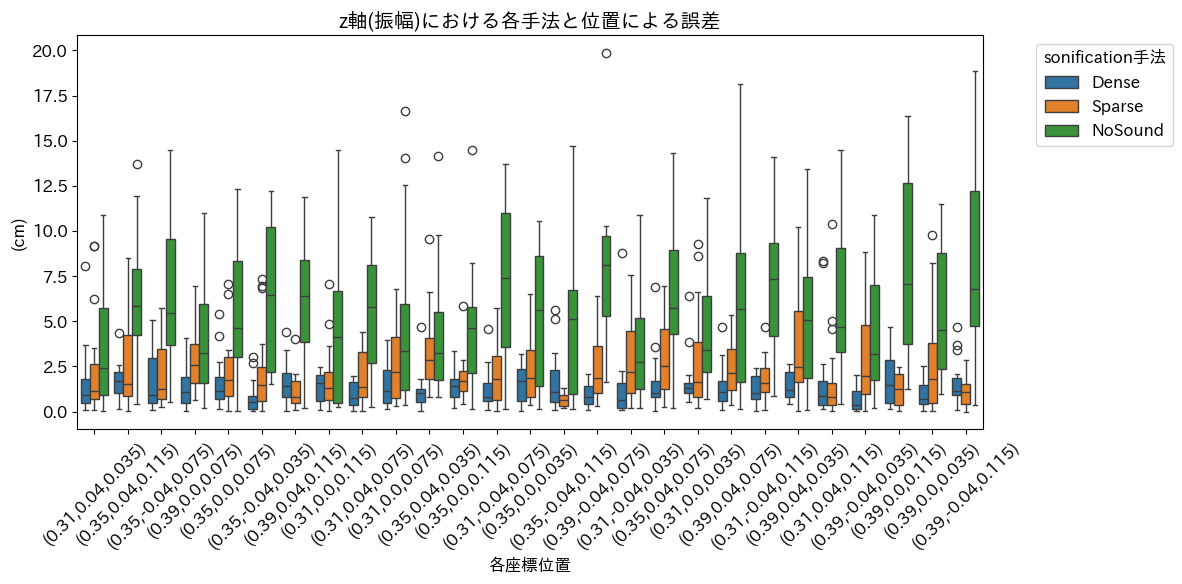

In [60]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: 'Dense',
    0: 'Sparse',
    1: 'NoSound',
  

  
    
    

}

place_labels ={0: '(0.31,-0.04,0.035)',
 1: '(0.31,-0.04,0.075)',
 2: '(0.31,-0.04,0.115)',
 3: '(0.31,0.0,0.035)',
 4: '(0.31,0.0,0.075)',
 5: '(0.31,0.0,0.115)',
 6: '(0.31,0.04,0.035)',
 7: '(0.31,0.04,0.075)',
 8: '(0.31,0.04,0.115)',
 9: '(0.35,-0.04,0.035)',
 10: '(0.35,-0.04,0.075)',
 11: '(0.35,-0.04,0.115)',
 12: '(0.35,0.0,0.035)',
 13: '(0.35,0.0,0.075)',
 14: '(0.35,0.0,0.115)',
 15: '(0.35,0.04,0.035)',
 16: '(0.35,0.04,0.075)',
 17: '(0.35,0.04,0.115)',
 18: '(0.39,-0.04,0.035)',
 19: '(0.39,-0.04,0.075)',
 20: '(0.39,-0.04,0.115)',
 21: '(0.39,0.0,0.035)',
 22: '(0.39,0.0,0.075)',
 23: '(0.39,0.0,0.115)',
 24: '(0.39,0.04,0.035)',
 25: '(0.39,0.04,0.075)',
 26: '(0.39,0.04,0.115)'}

df_all['X'] = df_all['X'] * 100
df_all['Y'] = df_all['Y'] * 100
df_all['Z'] = df_all['Z'] * 100

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置による誤差')
plt.xlabel('各座標位置')
plt.ylabel('(cm)')
plt.legend(title='sonification手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置による誤差')
plt.xlabel('各座標位置')
plt.ylabel('(cm)')
plt.legend(title='sonification手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置による誤差')
plt.xlabel('各座標位置')
plt.ylabel('(cm)')
plt.legend(title='sonification手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


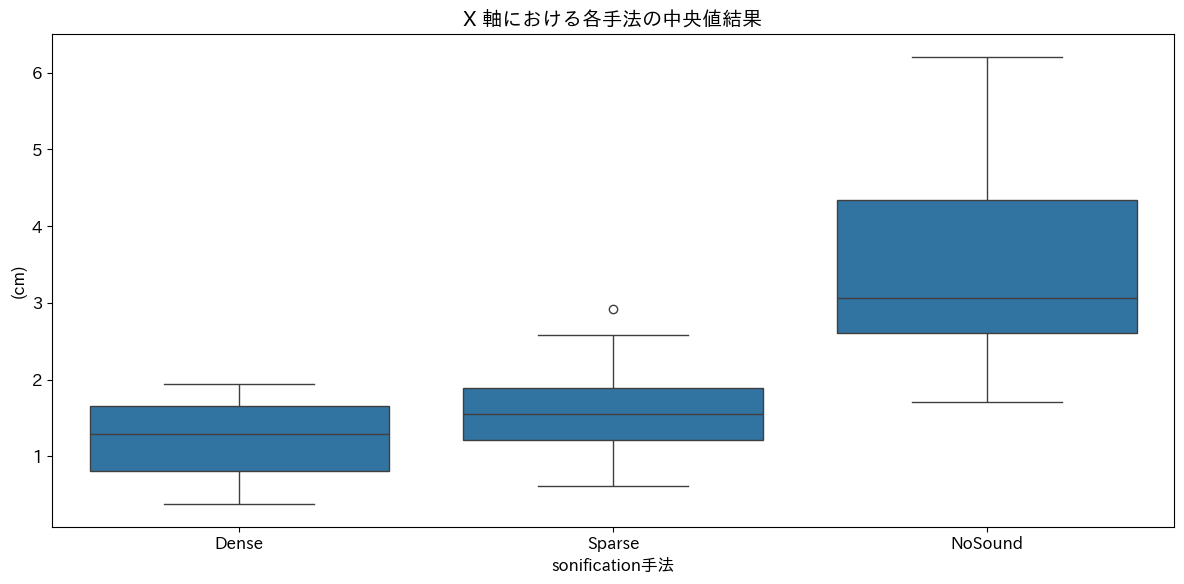

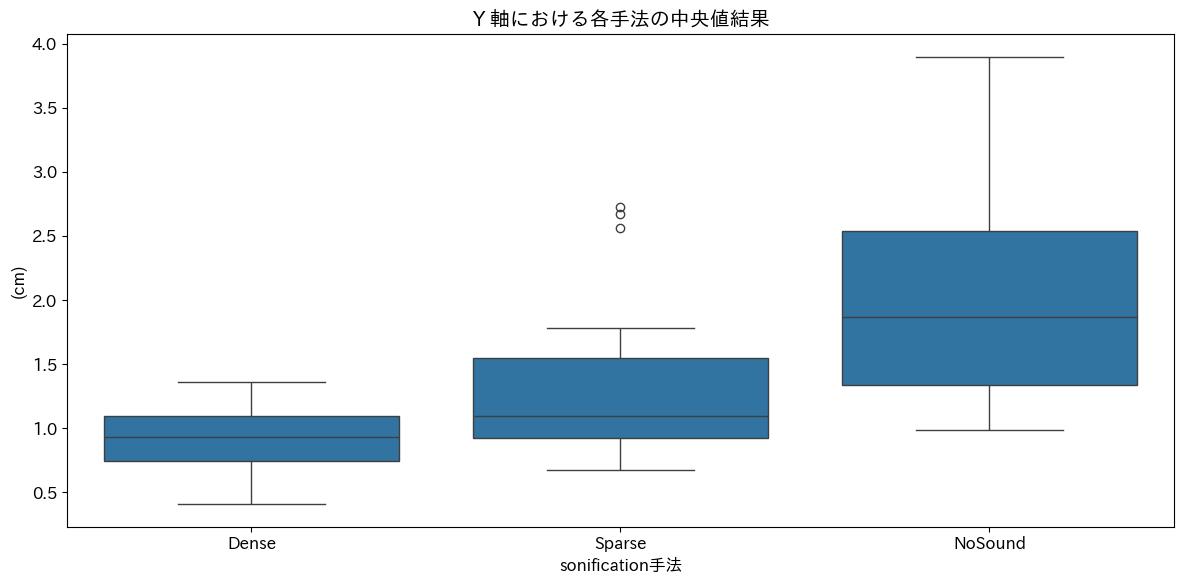

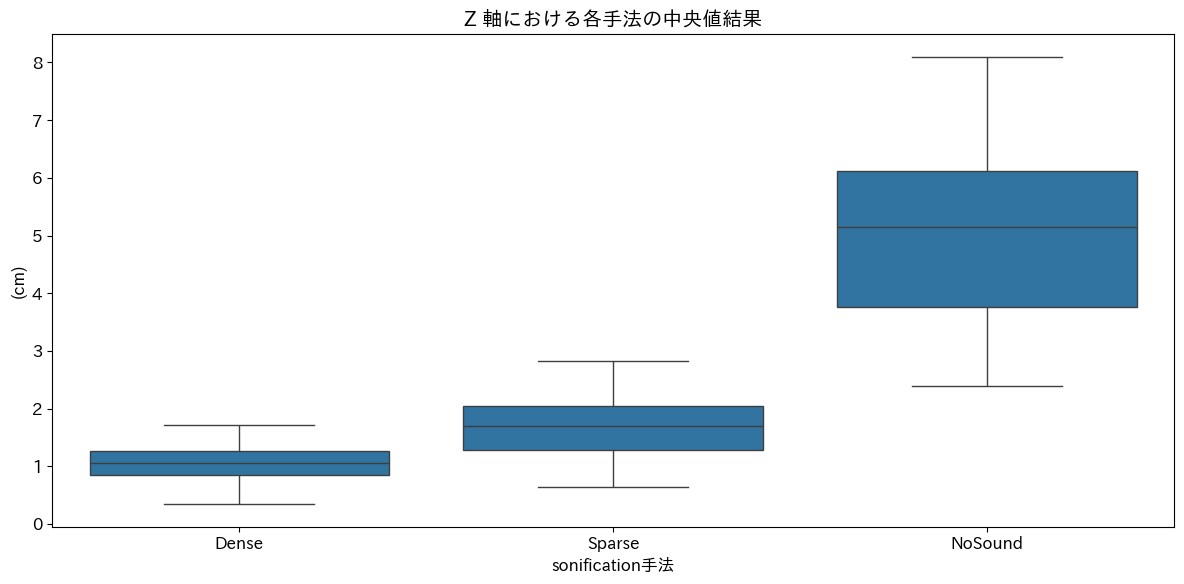

In [61]:
# Placeごとの中央値を計算 (数値列のみ対象)
numeric_columns = ['X', 'Y', 'Z']
df_median = df_all.groupby(['Place', 'Method'])[numeric_columns].median().reset_index()

# # Placeごとの平均値を計算 (数値列のみ対象)
# df_mean = df_all.groupby(['Subject', 'Method'])[numeric_columns].mean().reset_index()

# Methodのラベルを追加
df_median['Method_Label'] = df_median['Method'].map(method_labels)


# 中央値プロット
for axis in ['X', 'Y', 'Z']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Method_Label', y=axis, data=df_median)
    plt.title(f'{axis} 軸における各手法の中央値結果')
    plt.xlabel('sonification手法')
    plt.ylabel('(cm)')
    plt.tight_layout()
    plt.show()



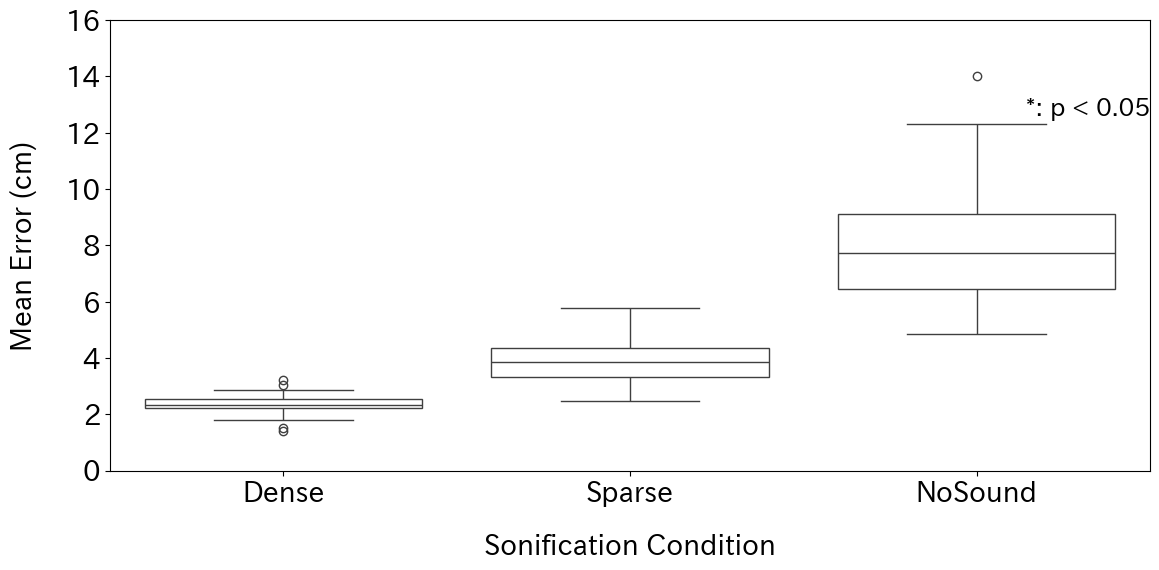

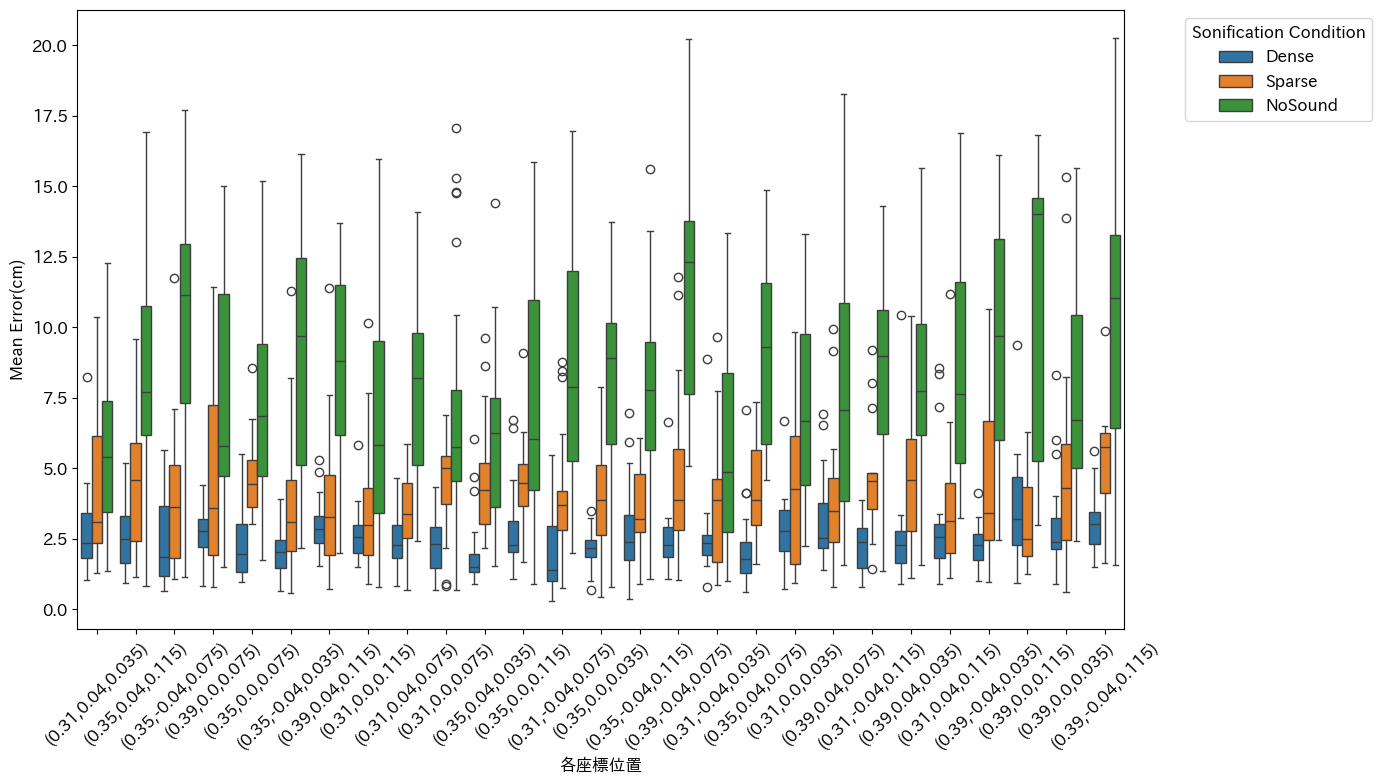

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import japanize_matplotlib

# 二乗平方和の列を追加
df_all['Sum_Squared_Error'] = np.sqrt(df_all['X']**2 + df_all['Y']**2 + df_all['Z']**2)

# MethodとPlaceごとの二乗平方和の中央値を計算
df_median_sse = df_all.groupby(['Method', 'Place'])['Sum_Squared_Error'].median().reset_index()
df_median_sse['Method_Label'] = df_median_sse['Method'].map(method_labels)

# Methodごとの二乗平方和の中央値を計算
df_median_sse_method = df_all.groupby('Method_Label')['Sum_Squared_Error'].median().reset_index()


plt.rcParams.update({'font.size': 20})

# Methodごとの二乗平方和のボックスプロットを作成
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method_Label', y='Sum_Squared_Error', data=df_median_sse, boxprops=dict(facecolor='none'))
plt.title('')
plt.xlabel('Sonification Condition',labelpad=20)
plt.ylabel('Mean Error (cm)',labelpad=20)
plt.text(2.5,13.3, '*: p < 0.05', horizontalalignment='right', verticalalignment='top', fontsize=18)
plt.tight_layout()
plt.ylim(0,16)
plt.show()

plt.rcParams.update({'font.size': 12})

# Placeごとの二乗平方和の分布を可視化
plt.figure(figsize=(14, 8))
sns.boxplot(x='Place_Label', y='Sum_Squared_Error', hue='Method_Label', data=df_all)
plt.title('')
plt.xlabel('各座標位置')
plt.ylabel('Mean Error(cm)')
plt.legend(title='Sonification Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Wilcoxon検定の結果CSVを読み込む
# df_wilcoxon_results = pd.read_csv('wilcoxon_bonferroni_results.csv')

# Shapiro-Wilk検定を各条件に対して実行
shapiro_results = []
methods = df_all['Method_Label'].unique()

for method in methods:
    data = df_all[df_all['Method_Label'] == method]['Sum_Squared_Error']
    stat, p_value = stats.shapiro(data)
    shapiro_results.append({
        'Method': method,
        'Shapiro_stat': stat,
        'Shapiro_p_value': p_value
    })

# Shapiro-Wilk結果をデータフレームに変換
df_shapiro_results = pd.DataFrame(shapiro_results)

# 結果を保存
shapiro_output_file = 'shapiro_wilcoxon_results.csv'
df_shapiro_results.to_csv(shapiro_output_file, index=False)
print(f"Shapiro-Wilk検定結果が {shapiro_output_file} に保存されました。")

# Friedman検定の実行
# 各条件のデータをリスト形式にまとめる
data_dense = df_all[df_all['Method_Label'] == 'Dense']['Sum_Squared_Error'].values
data_sparse = df_all[df_all['Method_Label'] == 'Sparse']['Sum_Squared_Error'].values
data_nosound = df_all[df_all['Method_Label'] == 'NoSound']['Sum_Squared_Error'].values

# Friedman検定
stat, p_value = stats.friedmanchisquare(data_dense, data_sparse, data_nosound)

# 検定結果を表示
print("Friedman検定の結果:")
print(f"統計量: {stat}, p値: {p_value}")

# Friedman検定の結果を保存
friedman_results = {
    'Friedman_stat': stat,
    'Friedman_p_value': p_value
}
friedman_output_file = 'friedman_results.csv'
pd.DataFrame([friedman_results]).to_csv(friedman_output_file, index=False)
print(f"Friedman検定結果が {friedman_output_file} に保存されました。")

# Shapiro-Wilk結果の一部を表示
print(df_shapiro_results)

# Friedman検定結果の一部を表示
print(friedman_results)


Shapiro-Wilk検定結果が shapiro_wilcoxon_results.csv に保存されました。
Friedman検定の結果:
統計量: 442.52916666666624, p値: 8.054014695825427e-97
Friedman検定結果が friedman_results.csv に保存されました。
    Method  Shapiro_stat  Shapiro_p_value
0    Dense      0.865959     7.123513e-20
1   Sparse      0.925626     1.111322e-14
2  NoSound      0.976507     5.526105e-07
{'Friedman_stat': 442.52916666666624, 'Friedman_p_value': 8.054014695825427e-97}


In [64]:
from itertools import combinations
import numpy as np
import scipy.stats as stats

# Wilcoxonの符号付順位検定
wilcoxon_results = []
methods = df_all['Method_Label'].unique()
num_comparisons = sum(1 for _ in combinations(methods, 2))

for method1, method2 in combinations(methods, 2):
    # データ抽出
    data1 = df_all[df_all['Method_Label'] == method1]['Sum_Squared_Error']
    data2 = df_all[df_all['Method_Label'] == method2]['Sum_Squared_Error']
    
    # Wilcoxon検定
    stat, p_value = stats.wilcoxon(data1, data2)
    
    # ペア数
    n = len(data1)
    
    # 効果量を計算
    z_value = stat / np.sqrt(n)  # Z統計量に相当する値
    effect_size = z_value / np.sqrt(n)
    
    # 結果をリストに追加
    wilcoxon_results.append({
        'Comparison': f'{method1} vs {method2}',
        'stat': stat,
        'p_value': p_value,
        'effect_size': effect_size
    })

# 結果をデータフレームに変換
df_wilcoxon_results = pd.DataFrame(wilcoxon_results)

# ボンフェローニ補正
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value'] * num_comparisons
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value_bonferroni'].apply(lambda x: min(x, 1.0))

# 有意性の判断
df_wilcoxon_results['significant'] = df_wilcoxon_results['p_value_bonferroni'] < 0.05

# ボンフェローニ補正結果をCSVファイルとして保存
output_file_bonferroni = 'wilcoxon_bonferroni_effectsize_results.csv'
df_wilcoxon_results.to_csv(output_file_bonferroni, index=False)

print(f"Wilcoxonの符号付順位検定結果（効果量含む、ボンフェローニ補正適用）が {output_file_bonferroni} に保存されました。")

# 結果の一部を表示
df_wilcoxon_results


Wilcoxonの符号付順位検定結果（効果量含む、ボンフェローニ補正適用）が wilcoxon_bonferroni_effectsize_results.csv に保存されました。


,Comparison,stat,p_value,effect_size,p_value_bonferroni,significant
0,Dense vs Sparse,23950.0,1.164884e-28,49.895833,3.494651e-28,True
1,Dense vs NoSound,3187.0,6.245500e-72,6.639583,1.873650e-71,True
2,Sparse vs NoSound,10354.0,1.023859e-54,21.570833,3.071578e-54,True
